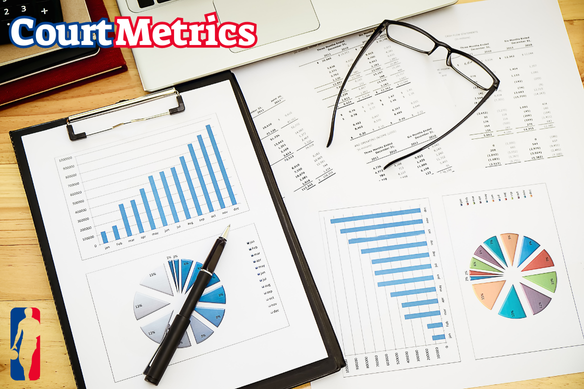

In [101]:
!pip install nba_api

In [102]:
import pandas as pd

from nba_api.stats.endpoints import commonallplayers #מאחזר רשימה של כל השחקנים בהיסטוריה כאחד
from nba_api.stats.endpoints import leaguedashteamstats #מספק סטטיסטיקות קבוצתיות, כולל נקודות, אסיסטים, ריבאונדים ומדדים אחרים עבור כל קבוצה
from nba_api.stats.endpoints import leaguedashplayerstats #מאחזר סטטיסטיקות שחקנים כגון נקודות, אסיסטים, ריבאונדים ועוד עבור כל השחקנים
from nba_api.stats.endpoints import leaguegamefinder #מוצא ומאחזר מידע משחק על סמך קריטריונים ספציפיים (למשל, קבוצה, תאריך או עונה).
from nba_api.stats.endpoints import playercareerstats #מאחזר סטטיסטיקות קריירה עבור שחקני בודדים לאורך כל היסטוריית המשחקים שלהם.
from nba_api.stats.endpoints import leaguestandings #מאחזר את דירוג הקבוצה לעונה ספציפית

In [103]:
#Player--
!wget -O player.txt "https://drive.google.com/uc?export=download&id=1mKQP64JWSPeCrhoYjSa8DdQPZ1jl969J"

#Team--
!wget -O team.txt "https://drive.google.com/uc?export=download&id=1wrxtAZ3MdYqsygBfdkub6HrUWY38TLk5"

#Season--
!wget -O season.txt "https://drive.google.com/uc?export=download&id=1pzYfoUmKA3TrP52k7aCm7L8Os11H1GKp"

--2024-10-05 09:54:28--  https://drive.google.com/uc?export=download&id=1mKQP64JWSPeCrhoYjSa8DdQPZ1jl969J
Resolving drive.google.com (drive.google.com)... 108.177.96.100, 108.177.96.101, 108.177.96.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.96.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1mKQP64JWSPeCrhoYjSa8DdQPZ1jl969J&export=download [following]
--2024-10-05 09:54:28--  https://drive.usercontent.google.com/download?id=1mKQP64JWSPeCrhoYjSa8DdQPZ1jl969J&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.31.132, 2a00:1450:4013:c1a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.31.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12 [application/octet-stream]
Saving to: ‘player.txt’

player.txt          100%[===================>]      12  --.-KB/s    in 0s      


In [104]:
#מבני נתונים:


#פוקנציה שמדפיסה את מבנה הנתונים שמקבלים מהאיי.פי.אי

def print_api_data_structure_players():
    players_data = commonallplayers.CommonAllPlayers(is_only_current_season=0).get_dict()
    players_headers = players_data['resultSets'][0]['headers']
    print(f'Data players Headers: {players_headers}')
    return players_headers

# פונקציה שמדפיסה את מבנה הנתונים של דירוג הקבוצות

def print_api_data_structure_standings():
    standings_data = leaguestandings.LeagueStandings().get_dict()
    standings_headers = standings_data['resultSets'][0]['headers']
    print(f'Data standings Headers: {standings_headers}')
    return standings_headers

# פונקציה שמדפיסה את מבנה הנתונים של סטטיסטיקות הקבוצות

def print_api_data_structure_team_stats():
    team_stats_data = leaguedashteamstats.LeagueDashTeamStats().get_dict()
    team_headers = team_stats_data['resultSets'][0]['headers']
    print(f'Team Stats Headers: {team_headers}')
    return team_headers

players_headers = print_api_data_structure_players()
standings_headers = print_api_data_structure_standings()
team_stats_headers = print_api_data_structure_team_stats()

Data players Headers: ['PERSON_ID', 'DISPLAY_LAST_COMMA_FIRST', 'DISPLAY_FIRST_LAST', 'ROSTERSTATUS', 'FROM_YEAR', 'TO_YEAR', 'PLAYERCODE', 'PLAYER_SLUG', 'TEAM_ID', 'TEAM_CITY', 'TEAM_NAME', 'TEAM_ABBREVIATION', 'TEAM_CODE', 'TEAM_SLUG', 'GAMES_PLAYED_FLAG', 'OTHERLEAGUE_EXPERIENCE_CH']
Data standings Headers: ['LeagueID', 'SeasonID', 'TeamID', 'TeamCity', 'TeamName', 'Conference', 'ConferenceRecord', 'PlayoffRank', 'ClinchIndicator', 'Division', 'DivisionRecord', 'DivisionRank', 'WINS', 'LOSSES', 'WinPCT', 'LeagueRank', 'Record', 'HOME', 'ROAD', 'L10', 'Last10Home', 'Last10Road', 'OT', 'ThreePTSOrLess', 'TenPTSOrMore', 'LongHomeStreak', 'strLongHomeStreak', 'LongRoadStreak', 'strLongRoadStreak', 'LongWinStreak', 'LongLossStreak', 'CurrentHomeStreak', 'strCurrentHomeStreak', 'CurrentRoadStreak', 'strCurrentRoadStreak', 'CurrentStreak', 'strCurrentStreak', 'ConferenceGamesBack', 'DivisionGamesBack', 'ClinchedConferenceTitle', 'ClinchedDivisionTitle', 'ClinchedPlayoffBirth', 'Eliminated

In [105]:
#Players:

def get_all_players(): #מחזירה את כל השחקנים ממאגר הנתונים
 data = commonallplayers.CommonAllPlayers(is_only_current_season=0).get_data_frames()[0]
 return data

def load_user_player(file_path): #פונקציה שקוראת את שם השחקן מתוך קובץ ומחזירה אותו כטקסט
  with open('player.txt', 'rt', encoding='utf-8-sig') as file:
    players = file.readline().strip()
  return players

def load_player(players): #מחפשת את השחקן על בסיס השם מתוך המאגר
  players = commonallplayers.CommonAllPlayers(is_only_current_season=0).get_dict()['resultSets'][0]['rowSet'] #קבל נתונים לא רק על שחקנים שפעילים כרגע
  for player in players:
    if player_name.lower() in player[2].lower():
      return player[0]
  return "Player don't found"

In [106]:
# מדפיס את המספר המזהה של השחקן

player_file = 'player.txt'
player_name = load_user_player(player_file)
player_id = load_player(player_name)

print(f"Player ID for {player_name}: {player_id}")

Player ID for Lebron James: 2544


In [107]:
#Teams

def get_all_teams(): #מחזיר את כל הנתונים הסטטיסטיים של הקבוצות בעונה
  teams_data = leaguedashteamstats.LeagueDashTeamStats().get_data_frames()[0]
  return teams_data

def load_user_teams(file_path): #קוראת שם קבוצה מקובץ טקסט ומחזירה את השם כטקסט
  with open('team.txt', 'rt', encoding='utf-8-sig') as file:
    teams_names = file.readline().strip()
  return teams_names

def load_team(teams_names): #מחפש את המספר זיהוי של קבוצה מסוימת
  teams = leaguedashteamstats.LeagueDashTeamStats(season="2023-24").get_dict()['resultSets'][0]['rowSet']
  for team in teams:
    if teams_names.lower() in team[1].lower():
      return team[0]
  return "Team don't found"

In [108]:
team_file = 'team.txt'
team_name = load_user_teams(team_file)  # טען את שם הקבוצה מהקובץ
team_id = load_team(team_name)  # חפש את ה-ID של הקבוצה

print(f"Team ID for {team_name}: {team_id}")

Team ID for Chicago Bulls: 1610612741


In [109]:
#Season

def load_user_season(file_path): #קוראת השנה מהקובץ
  with open('season.txt', 'rt', encoding='utf-8-sig') as file:
    season = file.readline().strip()
  return season

def load_season_id(file_path):
  season_name = load_user_season(file_path)
  season_id = get_season_id(season_name)
  return season_id

def get_season_id(season_str):
    start_year = season_str.split('-')[0] # העונה נכתבת בפורמט '2023-24', נוציא את החלק הראשון
    season_id = f"{start_year}"
    return season_id

In [110]:
season_file = 'season.txt'
season_id = load_season_id(season_file)

print(f"Season ID for {season_file}: {season_id}")

Season ID for season.txt: 2023
